In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import (KFold, train_test_split)
from matplotlib import cm
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

## Importing and Spliting Data

In [2]:
# Import Data
url = 'https://raw.githubusercontent.com/pgardocki3/ME8813ML/master/Project%208813/superconductor.csv'
df = pd.read_csv(url)


df=(df-df.mean())/df.std()

# Split data into train/test sets

X = df.iloc[:,0:-2]
X1 = df.iloc[:,1:11]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)


df.head()



,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-0.080056,0.046732,-0.451640,-0.158846,-0.611805,0.044357,-0.003707,0.133722,-0.053037,0.378177,...,-0.752138,-0.805893,-0.711688,0.186288,0.035182,-0.837939,-0.406157,-0.838353,-0.520057,-0.158264
1,0.614729,0.174265,-0.432061,0.059367,-0.604166,0.777412,-0.015267,0.133722,0.108898,0.134898,...,-0.752138,-1.116705,-0.719437,0.664955,-0.014779,-0.033010,-0.362343,-0.426856,-0.450811,-0.245844
2,-0.080056,0.046732,-0.450967,-0.158846,-0.611644,0.044357,-0.218978,0.133722,0.093292,0.378177,...,-0.740146,-0.805893,-0.700712,0.186288,-0.062233,-0.837939,-0.376948,-0.838353,-0.503292,-0.450197
3,-0.080056,0.046732,-0.451304,-0.158846,-0.611724,0.044357,-0.103613,0.133722,0.020127,0.378177,...,-0.746142,-0.805893,-0.706208,0.186288,-0.010537,-0.837939,-0.391552,-0.838353,-0.511512,-0.362617
4,-0.080056,0.046732,-0.452314,-0.158846,-0.611966,0.044357,0.162771,0.133722,-0.199367,0.378177,...,-0.764131,-0.805893,-0.722601,0.186288,0.113625,-0.837939,-0.435366,-0.838353,-0.538165,-0.333424


### Pearson Correlation

                         mean_atomic_mass  wtd_mean_atomic_mass  \
mean_atomic_mass                 1.000000              0.815977   
wtd_mean_atomic_mass             0.815977              1.000000   
gmean_atomic_mass                0.940298              0.848242   
wtd_gmean_atomic_mass            0.745841              0.964085   
entropy_atomic_mass             -0.104000             -0.308046   
wtd_entropy_atomic_mass         -0.097609             -0.412666   
range_atomic_mass                0.125659             -0.144029   
wtd_range_atomic_mass            0.446225              0.716623   
std_atomic_mass                  0.196460             -0.060739   
wtd_std_atomic_mass              0.130675             -0.089471   

                         gmean_atomic_mass  wtd_gmean_atomic_mass  \
mean_atomic_mass                  0.940298               0.745841   
wtd_mean_atomic_mass              0.848242               0.964085   
gmean_atomic_mass                 1.000000             

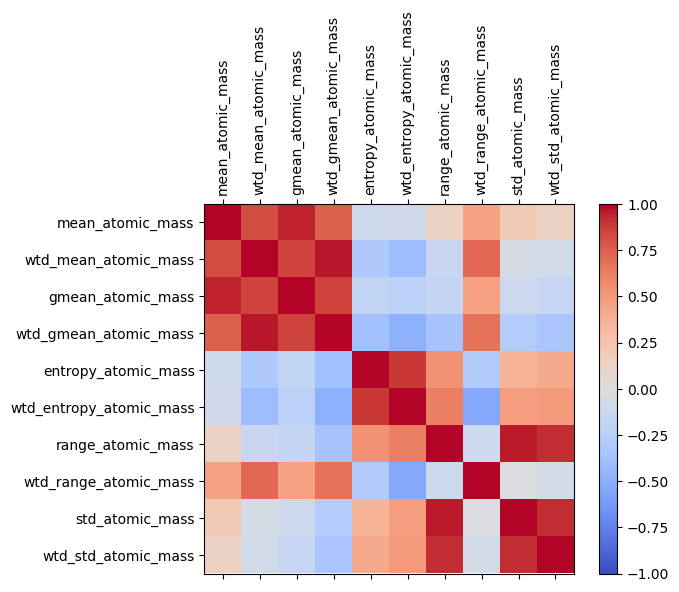

In [4]:
corr = X1.corr()
print(corr)
fig = plt.figure()
#plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X1.columns)
ax.set_yticklabels(X1.columns)
plt.show()

### K-Means

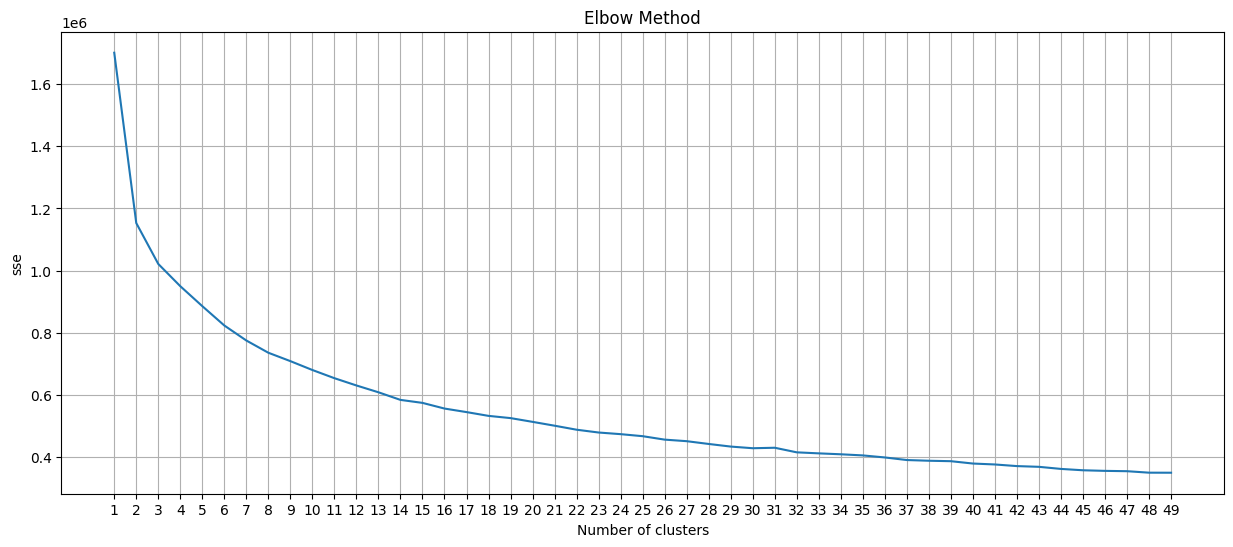

In [4]:

sse = []
minClust = 1
maxClust = 50
for i in range(minClust, maxClust):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3000, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(15, 6))
plt.plot(range(minClust, maxClust), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.xticks(np.arange(minClust, maxClust, 1))
plt.grid()
plt.show()

### PCA

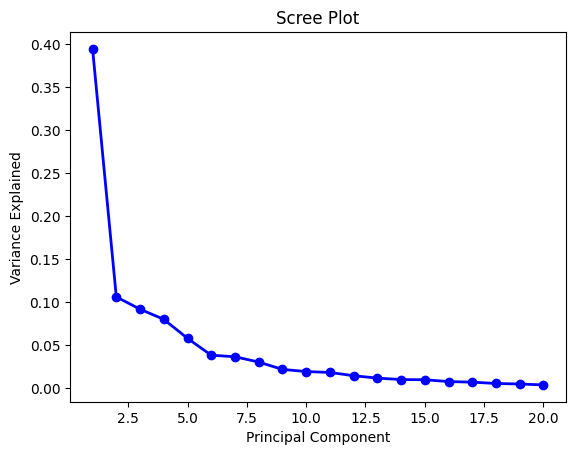

0.9701886957805731


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar = StandardScaler()
scaled_df = X.copy()
scaled_df = pd.DataFrame(scalar.fit_transform(scaled_df),columns=scaled_df.columns)

# Perform PCA
pca = PCA(n_components=20)
pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(sum(pca.explained_variance_ratio_))

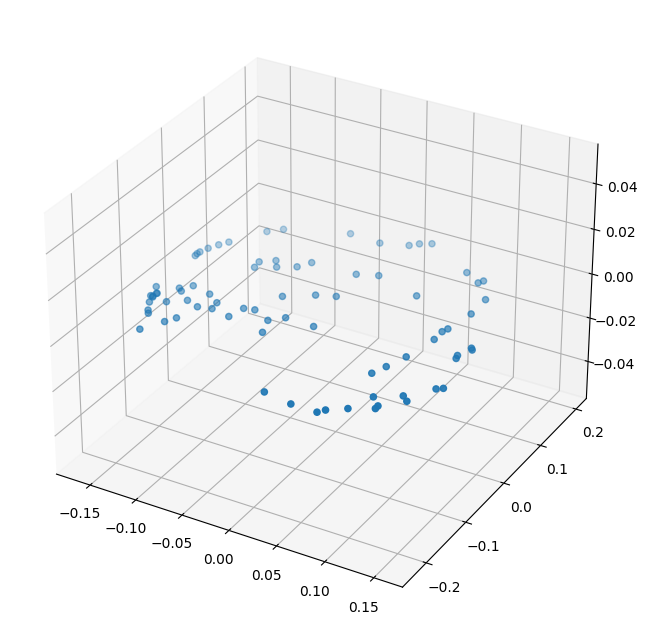

In [7]:
# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
#ax.scatter(X_train.iloc[:,9],X_train.iloc[:,22],y_train,label='data')
ax.scatter(pca.components_[0].reshape(1,-1),pca.components_[1].reshape(1,-1),label='data')

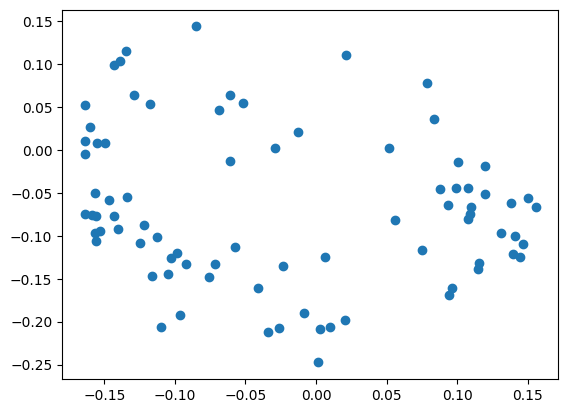

In [8]:
#plt.scatter(X_train.iloc[:,5], y_train)
plt.scatter(pca.components_[0].reshape(1,-1),pca.components_[2].reshape(1,-1),label='data')
plt.show()

In [38]:
data = pca.transform(scaled_df)
print(data.shape)

(21263, 20)


# ANN

## No PCA

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 70)                5670      
                                                                 
 dense_5 (Dense)             (None, 70)                4970      
                                                                 
 dense_6 (Dense)             (None, 70)                4970      
                                                                 
 dense_7 (Dense)             (None, 70)                4970      
                                                                 
 dense_8 (Dense)             (None, 1)                 71        
                                                                 
Total params: 20,651
Trainable params: 20,651
Non-trainable params: 0
_________________________________________________________________


C:\Users\Patrick Gardocki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Test Accuracy: 0.900
167/167 [==============================] - 0s 596us/step
Train Accuracy:  0.9552965760231018
MSE 0.3008972024825362


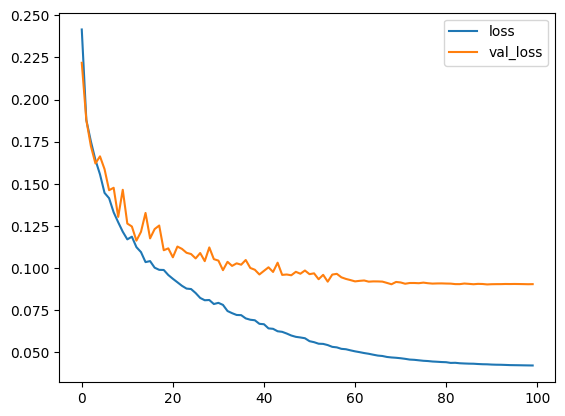

In [61]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow_addons.metrics import RSquare

initial_learning_rate = 0.1
epochs = 100
decay = initial_learning_rate / epochs

def r_squared(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)


input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
    tf.keras.Input(shape=(80,)),
    tf.keras.layers.Dense(units=70, activation='relu', 
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=70, activation='relu'),
    tf.keras.layers.Dense(units=70, activation='relu'),
    tf.keras.layers.Dense(units=70, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])
model.summary()

model.compile(optimizer='adam', loss='mse', metrics=[r_squared])

losses = model.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=100,
                   verbose=0,
                   callbacks=[LearningRateScheduler(lr_time_based_decay,verbose=0)]
                   )

loss1, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
y_pred = model.predict(X_test)

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

print('Train Accuracy: ',losses.history['r_squared'][-1])
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)


# Plot
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
# ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1))
# plt.show()
# plt.plot(losses.history['r_squared'])



0.9552965760231018


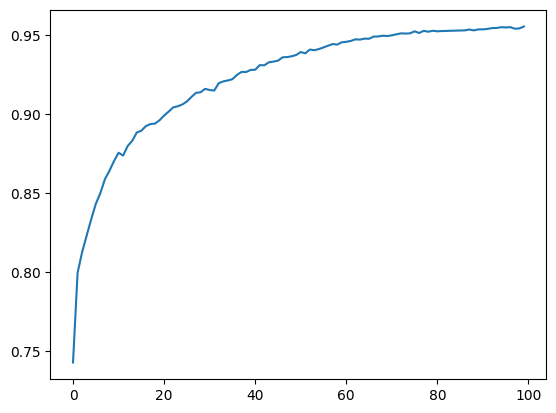

In [62]:
plt.plot(losses.history['r_squared'])
print(losses.history['r_squared'][-1])
# from tensorflow_addons.metrics.r_square import RSquare
# metric = RSquare()
# metric.update_state(y_test, y_pred)
# result = metric.result()
# result.numpy()


## W/ PCA

In [60]:

data = pca.transform(scaled_df)
X_train_pca, X_test_pca = train_test_split(data, test_size=.25, random_state=1)
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

input_shape = [X_train_pca.shape[1]]
model = tf.keras.Sequential([
    tf.keras.Input(shape=(20,)),
    tf.keras.layers.Dense(units=80,activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=80,activation='relu'),
    tf.keras.layers.Dense(units=80,activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])
model.summary()

model.compile(optimizer='adam',loss='mse', metrics=[r_squared])

losses = model.fit(X_train_pca, y_train,
                   validation_data=(X_test_pca,y_test),
                   epochs=100,
                   verbose=0,
                   callbacks=[LearningRateScheduler(lr_time_based_decay,verbose=0)]
                   )
loss1, acc = model.evaluate(X_test_pca, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

y_pred = model.predict(X_test_pca)

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()


loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
print('Train Accuracy: ',losses.history['r_squared'][-1])
# model.optimizer.get_config()


NameError: name 'pca' is not defined

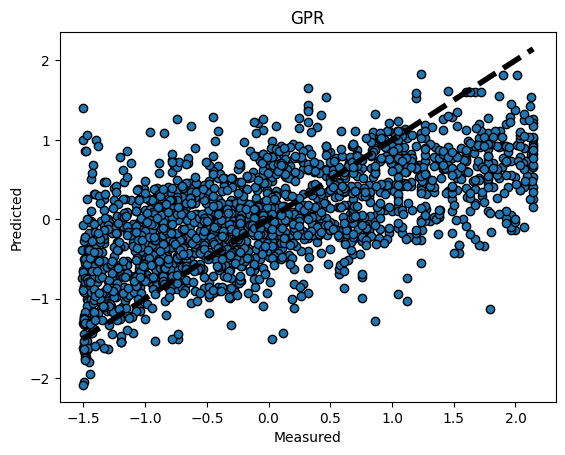

In [150]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GPR')
plt.show()





In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Exponentiation
from sklearn.model_selection import cross_val_score

# Selecting data

data = pca.transform(scaled_df)
X_train_pca, X_test_pca = train_test_split(data, test_size=.25, random_state=1)
kernel = RBF() + WhiteKernel()
        
gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=2, alpha=1e-10)
gpr.fit(X_train_pca, y_train)
y_pred = gpr.predict(X_test_pca)
score = cross_val_score(gpr,X_test_pca, y_test, cv=2)
print(score)
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
print(f"RBF Lengthscale: {gpr.kernel_}")

# Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1))

plt.show()

KeyboardInterrupt: 

Mean MAE: 0.736 (0.014)
MSE 0.5216801883543057


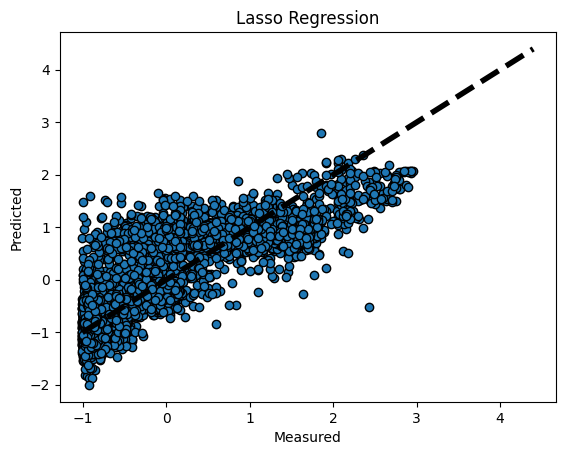

In [14]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

# Selecting data


model = linear_model.Ridge(alpha=.001)
cv = sk.model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = sk.model_selection.cross_val_score(model,X_train, y_train, cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
# print("* Model coefficients:")
# print("  w0:", model.intercept_)
# print("  w1:", model.coef_[0])

# Plot
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
# ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1),
#                        linewidth=0, antialiased=False)

plt.show();


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Lasso Regression')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [35]:
# https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

X_train = X_train
X_val = X_test
y_train = y_train
y_val = y_test

# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
#     batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=80, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='relu'))
        nn.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasRegressor(build_fn=nn_cl_fun, epochs=epochs,
                         verbose=0)
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.001, 1),
#     'batch_size':(200, 1000),
    'epochs':(50, 150)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=500, n_iter=4)


|   iter    |  target   | activa... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------
| 1         | nan       | 5.51      | 66.91     | 0.4366    | 79.23     | 2.067     |
| 2         | nan       | 1.342     | 52.25     | 0.4208    | 31.48     | 2.364     |


KeyboardInterrupt: 

In [36]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

{'activation': 'elu',
 'epochs': 66.90697543456363,
 'learning_rate': 0.43662296035179904,
 'neurons': 79.23362252708105,
 'optimizer': 2.067277130820133}

In [30]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=80, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasRegressor(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,5),
    'layers2':(1,5),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=15, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | nan       | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.597     | 1.09      | 0.426     | 31.48     | 0.3377    | 6.935     |
| 2         | nan       | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 2.865     | 1.473     | 0.08322   | 91.07     | 0.794     | 5.884     |
| 3         | nan       | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.11      | 2.817     | 0.1143    | 83.55     | 0.6977    | 3.957     |
| 4         | nan       | 2.468     | 998.8     | 0.138     | 0.1846    | 58.8      | 2.62      | 3.911     | 0.3296    | 46.05     | 0.319     | 6.631     |


KeyboardInterrupt: 

In [31]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'elu',
 'batch_size': 335,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 44,
 'layers1': 2,
 'layers2': 1,
 'learning_rate': 0.42602224734191213,
 'neurons': 31,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.optimizers.legacy.ftrl.Ftrl at 0x219f6d5b990>}

In [32]:
# Fitting Neural Network

def r_squared(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=80, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
# nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'], verbose=0)
nn = nn_cl_fun()
nn.compile(optimizer='adam',loss='mse', metrics=[r_squared])

losses = nn.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=100,
                   verbose=0,
#                    callbacks=[LearningRateScheduler(lr_time_based_decay,verbose=0)]
                   )
# nn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)
nn.summary()
y_pred = nn.predict(X_test)
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)

Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 31)                2511      
                                                                 
 dense_477 (Dense)           (None, 31)                992       
                                                                 
 dense_478 (Dense)           (None, 31)                992       
                                                                 
 dense_479 (Dense)           (None, 31)                992       
                                                                 
 dense_480 (Dense)           (None, 1)                 32        
                                                                 
Total params: 5,519
Trainable params: 5,519
Non-trainable params: 0
_________________________________________________________________
167/167 [==============================] - 0s 672u

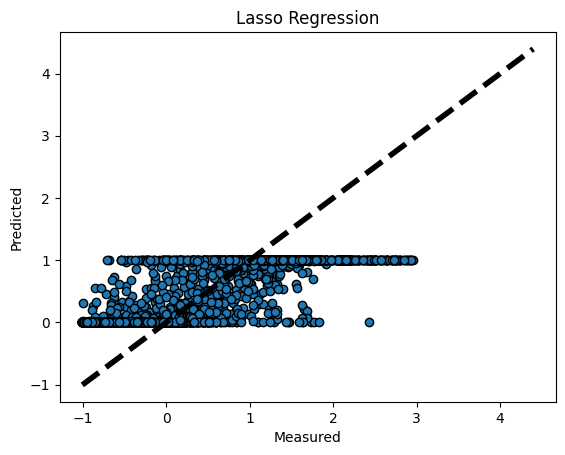

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Lasso Regression')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [70]:
# Building a simple neural network

def build_model():
    model=keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=[80,]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])
    #No activation is used in the last layer as this is regression
    optimizer= tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss='mse',
                 optimizer= optimizer,
                 metrics= ['mae', 'mse'])
    return model

In [71]:
model= build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               10368     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,737
Trainable params: 20,737
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Setting 'restore_best_weights' as True helps restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)

history= model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks= [early_stopping_cb])

loss, mae, mse= model.evaluate(X_test, y_test, verbose=2)

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 36286

Epoch 100: early stopping
167/167 - 0s - loss: 0.1091 - mae: 0.2025 - mse: 0.1091 - 124ms/epoch - 744us/step
Test-set Mean absolute error:  0.20


Text(0.5, 1.0, 'Train - MAE')

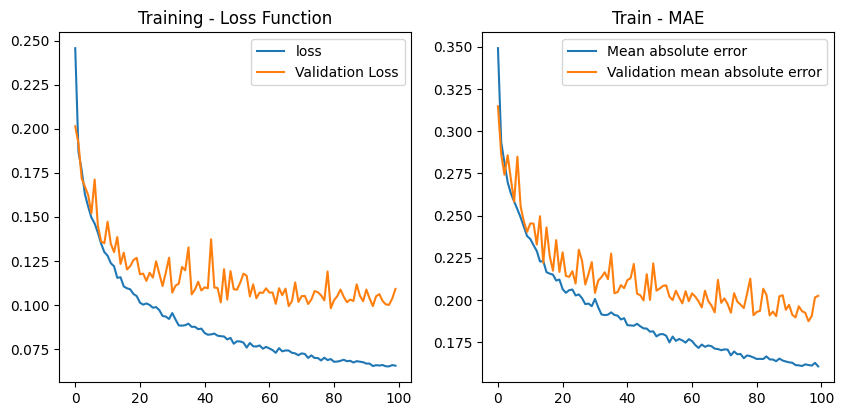

In [73]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

167/167 [==============================] - 0s 559us/step


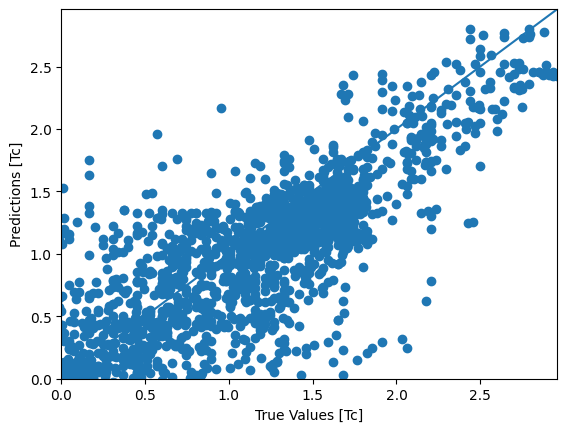

In [84]:
y_pred_test= model.predict(X_test).flatten()

# a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values [Tc]')
plt.ylabel('Predictions [Tc]')

lims=[0, max(y_test)]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

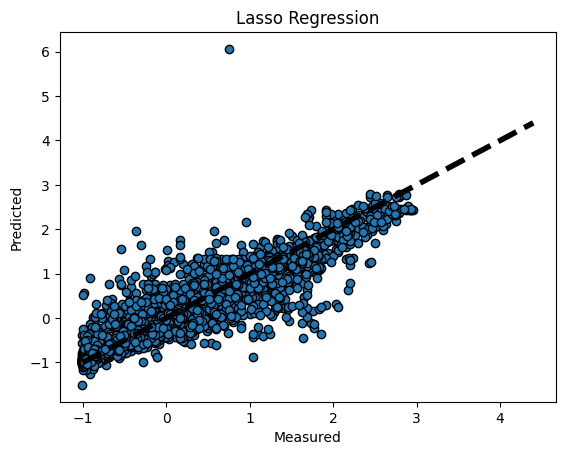

In [82]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Lasso Regression')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

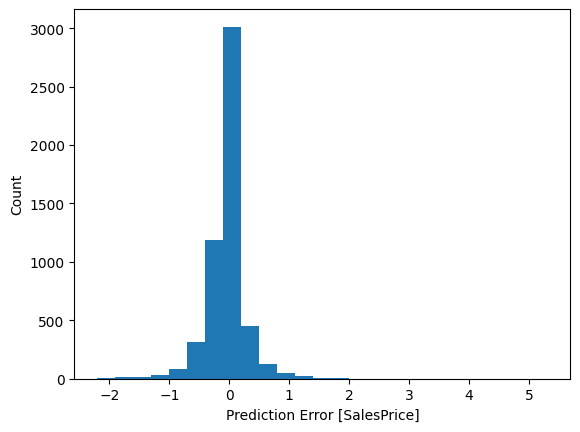

In [76]:
error= y_pred_test-y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SalesPrice]')
_=plt.ylabel('Count')

In [81]:
# Accuracy metrics :
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train= model.predict(X_train).flatten()

print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, y_pred_test)))

#Hence the current test accuracy is 0.48385 and Test MSE is 59703.04
# Note- adding a droput layer decreases the accuracy to 0.46

499/499 [==============================] - 0s 638us/step
Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.9360073114026757
Test accuracy:  0.8886350142223282
Test mean-squared error:  0.3302826483010607
